In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os; os.chdir("..")

In [3]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [ ]:
from orthogonal_dfa.spliceai.load_model import load_spliceai
from orthogonal_dfa.data.sample_text import sample_text
from orthogonal_dfa.data.exon import default_exon
from orthogonal_dfa.deep_dfa import ProbabilisticAutoma
from orthogonal_dfa.math import corr
from orthogonal_dfa.oracle.evaluate import evaluate_hard_dfa, print_metrics
from orthogonal_dfa.utils.dfa import dfa_symbols_to_num

In [5]:
model = load_spliceai(400, 0).eval()

In [6]:
random, arr = sample_text(default_exon, 0, 1000)

In [7]:
from orthogonal_dfa.oracle.run_model import run_model

In [8]:
rand = torch.tensor(random).cuda()
normalized_target, hard_target = run_model(model, arr)

In [9]:
automaton = ProbabilisticAutoma(4, 8, 2)

In [10]:
steps = 400
optim = torch.optim.Adam(automaton.parameters())
for i in range(steps):
    optim.zero_grad()
    ap = automaton(rand, (steps-i)/steps)[:, 1]
    ap = corr.normalize(ap)
    c = ap @ normalized_target
    loss = - (c).abs()
    loss.backward()
    optim.step()
    if i % 10 ==  0:
        print(i, c.item())

0 0.02784573659300804
10 0.058755531907081604
20 0.060828521847724915
30 0.06176577880978584
40 0.06303871423006058
50 0.06469418108463287
60 0.06840474903583527
70 0.08758179098367691
80 0.10183558613061905
90 0.11850471794605255
100 0.12282679229974747
110 0.1268664449453354
120 0.12965792417526245
130 0.131747305393219
140 0.13424640893936157
150 0.13657736778259277
160 0.13855811953544617
170 0.14001843333244324
180 0.14081662893295288
190 0.1416856050491333
200 0.14213648438453674
210 0.14291270077228546
220 0.14342375099658966
230 0.14424659311771393
240 0.14503146708011627
250 0.14605966210365295
260 0.14721694588661194
270 0.14878465235233307
280 0.15064407885074615
290 0.15300172567367554
300 0.1559395045042038
310 0.159547820687294
320 0.16373716294765472
330 0.16839677095413208
340 0.17338302731513977
350 0.17918865382671356
360 0.18734246492385864
370 0.199668750166893
380 0.21777425706386566
390 0.23460334539413452


In [11]:
dfa = automaton.net2dfa(0.01)

############ pythomata MINIMUM DFA
{'_state_attributes': {}, '_transition_attributes': {}, '_states': {0, 1, 2, 3, 4, 5, 6, 7}, '_alphabet': <pythomata.alphabets.MapAlphabet object at 0x7fd427017510>, '_initial_state': 7, '_accepting_states': {1, 2, 3, 4, 5, 6}, '_transition_function': {7: {'3': 4, '1': 2, '0': 4, '2': 6}, 3: {'0': 2, '3': 2, '2': 2, '1': 6}, 0: {'0': 2, '1': 1, '2': 6, '3': 5}, 2: {'0': 2, '3': 4, '2': 2, '1': 4}, 6: {'1': 3, '2': 0, '0': 3, '3': 3}, 5: {'1': 0, '0': 4, '2': 5, '3': 5}, 4: {'3': 4, '1': 2, '0': 7, '2': 4}, 1: {'3': 2, '2': 2, '1': 6, '0': 0}}, '_idx_to_state': [0, 1, 2, 3, 4, 5, 6, 7], '_state_to_idx': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}, '_idx_to_symbol': ['1', '3', '0', '2'], '_symbol_to_idx': {'1': 0, '3': 1, '0': 2, '2': 3}, '_idx_transition_function': {0: {2: 2, 0: 1, 3: 6, 1: 5}, 1: {1: 2, 3: 2, 0: 6, 2: 0}, 2: {2: 2, 1: 4, 3: 2, 0: 4}, 3: {2: 2, 1: 2, 3: 2, 0: 6}, 4: {1: 4, 0: 2, 2: 7, 3: 4}, 5: {0: 0, 2: 4, 3: 5, 1: 5}, 6: {0: 3, 

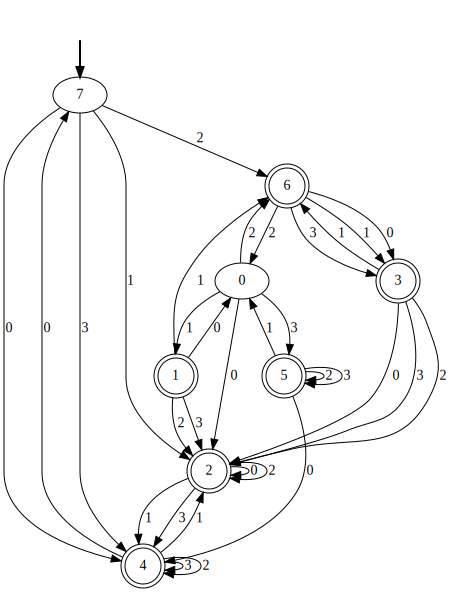

In [12]:
dfa.to_graphviz()

In [ ]:
conf = evaluate_hard_dfa(default_exon, dfa_symbols_to_num(dfa), model)